In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

## add your path as a variable below aman_path
aman_path = '/content/gdrive/My Drive/School/Undergrad/Fall 2021/CS 490/Group Project/Code'

## cd into your path instead of aman_path. Don't delete, just comment out.
%cd -q $aman_path

IS_DATA_STD = True

if IS_DATA_STD:
  DATA_PATH = '../Data/Standardized'
else:
  DATA_PATH = '../Data/Unstandardized'

SAVE_PLOT_PATH = './plots/CDF'

Mounted at /content/gdrive/


# Loading CDFs of Raw Data

In [ ]:
import pickle
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datasets = glob(f'{DATA_PATH}/*.dat')
datasets

['../Data/Standardized/fb.dat',
 '../Data/Standardized/amzn.dat',
 '../Data/Standardized/random.dat',
 '../Data/Standardized/binomial.dat',
 '../Data/Standardized/poisson.dat',
 '../Data/Standardized/exponential.dat',
 '../Data/Standardized/lognormal.dat']

In [ ]:
def load_data(paths):
  datasets = {}
  for path in paths:
    name = path.split('/')[-1].split('.')[0]
    with open(path, 'rb') as f:
      datasets[name] = pickle.load(f)
  return datasets

def std(datasets, is_std=IS_DATA_STD):
  for dataset in datasets:
    if not is_std:
      datasets[dataset]['data'] = (datasets[dataset]['data'] - datasets[dataset]['data'].mean()) / datasets[dataset]['data'].std() # normalize keys
    
    datasets[dataset]['memory'] = (datasets[dataset]['memory'] - datasets[dataset]['memory'].mean()) / datasets[dataset]['memory'].std() # normalize memory 
  return datasets

def plot_cdf(datasets, save_path=SAVE_PLOT_PATH):
  for dataset in datasets:
    fig, ax = plt.subplots()
    sns.scatterplot(datasets[dataset]['data'], datasets[dataset]['memory'])
    plt.xlabel('Std. Key')
    plt.ylabel('Std. Page')
    plt.title(f'CDF of {dataset} Data')
    plt.tight_layout()
    if save_path:
      fig.savefig(f'{save_path}/{dataset}.png')
      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

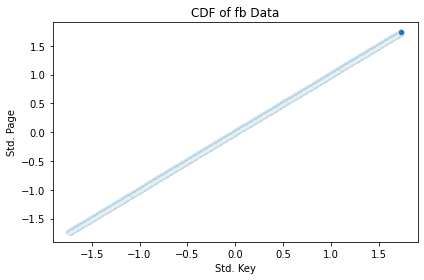

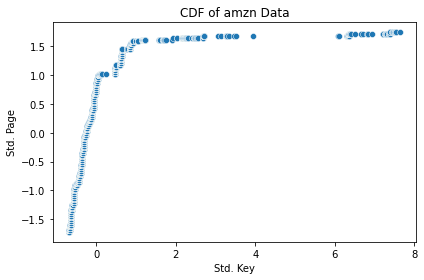

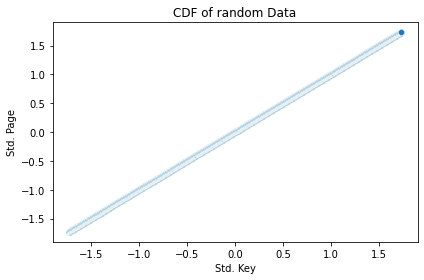

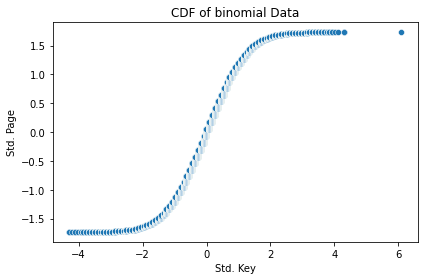

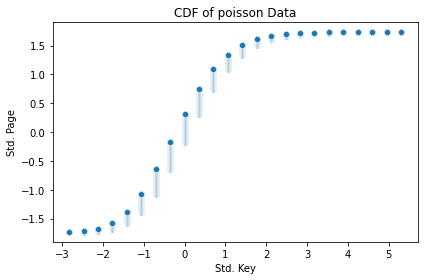

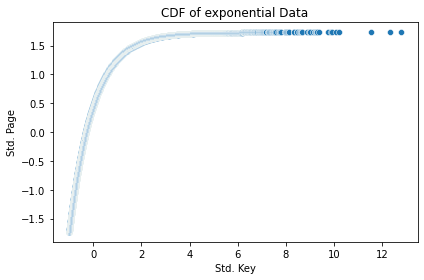

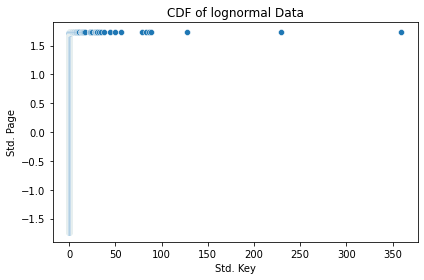

In [ ]:
data = load_data(datasets)
data = std(data)
plot_cdf(data)

# Loading CDFs of Data Learning During Each Epoch of ANN Training

**Load Models**

In [ ]:
import pickle

with open('./models/Standardized/ann.dat', 'rb') as f:
    ann_data = pickle.load(f)
ann_data.keys()

dict_keys(['fb', 'amzn', 'random', 'binomial', 'poisson', 'exponential', 'lognormal'])

In [ ]:
data = load_data(datasets)
data.keys()

dict_keys(['fb', 'random', 'amzn', 'poisson', 'lognormal', 'exponential', 'binomial'])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
for dist in ann_data:
  for ann in ann_data[dist]:
    preds_all_epochs = ann_data[dist][ann]['history']
    keys = data[dist]['data'][:50]
    fig = go.Figure()
    for i, preds in enumerate(preds_all_epochs):
      epoch = i + 1
      preds = ((preds - preds.mean()) / preds.std()).flatten()
      fig.add_trace(go.Scatter(x=keys, y=preds[:50000], name=epoch, mode='markers'))
    fig.update_layout(title=f'CDF During Each Training Epoch on {dist.upper()} Dataset', xaxis=dict(title='Std. Key'), yaxis=dict(title='Std. Page'))
    fig.show()


Output hidden; open in https://colab.research.google.com to view.